# seyed ali hoseiny nasab
# 401222047
## repeat:10 time
 min , max

In [8]:
import time
import random
from math import sqrt,ceil,floor
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class row:
    def __init__(self,A,row,col) -> None:
        self.m =[]
        self.A = A
        self.size = row*col
        self.col=col
        self.row = row
        for i in range(row):
            self.m.append(A[i*col:i*(col)+col])

        # print(self.m)
    def __str__(self) -> str:
        return str(self.A)
    def get_at(self,j,i):
        return self.A[j*self.col+i]
    def set_at (self,j,i,element):
        self.A[j*self.col+i] = element
    def idx_rc(self,i):
        return (i//self.col,i%self.col)
    def rc_ixd(self,i,j):
        return j*self.col+i


    def youngify(self, i, j,banned:list):
        largest_i = i
        largest_j = j
        if (i+1 , j) not in banned:
            if i + 1 < self.row and self.get_at(i + 1, j) > self.get_at(i, j):
                largest_i = i + 1
                largest_j = j
        if (i, j+1) not in banned:
            if j + 1 < self.col and self.get_at(i, j + 1) > self.get_at(largest_i, largest_j):
                largest_i = i
                largest_j = j + 1

        if largest_i != i or largest_j != j:
            temp = self.get_at(i, j)
            self.set_at(i, j, self.get_at(largest_i, largest_j))
            self.set_at(largest_i, largest_j, temp)
            self.youngify(largest_i, largest_j,banned)

    def print_table(self):
        for i in range(self.row):
            for j in range(self.col):
                print(self.get_at(i,j),' ', end='')
            print('')

        print('')

    def convert_to_young(self,banned):
        for i in range(self.row - 1, -1, -1):
            for j in range(self.col - 1, -1, -1):
                self.youngify(i, j,banned)

        return self.A

    def sort_young(self):
        banned = []
        for _ in range(len(self.A)):
            self.convert_to_young(banned)
            banned.append(self.idx_rc(len(self.A)-len(banned)-1))
            self.A[0] , self.A[-len(banned)] = self.A[-len(banned)], self.A[0]
            # self.print_table()

        return self.A


In [5]:
def genRand(n):
    random.seed(5)
    return [random.randint(0,1000000000) for x in range(n)]

In [6]:
x = []
average = []
minTime = []
maxTime = []
for i in range(1,11):
    n = i*100
    print(f'length of array:{n}')
    sum = 0
    ma = 0
    mi = 1000000000000
    for j in range(10):
        ro = ceil(sqrt(n))
        col = floor(sqrt(n))
        data = genRand(ro*col)
        st = time.process_time()

        m = row(data,ro,col)
        m.sort_young()

        et = time.process_time()
        res = et - st
        sum+=res
        mi = min(mi,res)
        ma = max(ma, res)
    x.append(n)
    minTime.append(mi)
    maxTime.append(ma)
    average.append(sum/10)
    print('CPU Mean Execution time:', sum/10, 'Max:',ma,' Min:',mi,' seconds')

length of array:100
CPU Mean Execution time: 0.0359375 Max: 0.046875  Min: 0.03125  seconds
length of array:200
CPU Mean Execution time: 0.228125 Max: 0.265625  Min: 0.21875  seconds
length of array:300
CPU Mean Execution time: 0.615625 Max: 0.640625  Min: 0.609375  seconds
length of array:400
CPU Mean Execution time: 1.34375 Max: 1.390625  Min: 1.296875  seconds
length of array:500
CPU Mean Execution time: 2.71875 Max: 3.375  Min: 2.5625  seconds
length of array:600
CPU Mean Execution time: 4.5203125 Max: 4.921875  Min: 4.171875  seconds
length of array:700
CPU Mean Execution time: 7.4046875 Max: 8.203125  Min: 6.84375  seconds
length of array:800
CPU Mean Execution time: 11.0578125 Max: 11.625  Min: 10.5625  seconds
length of array:900
CPU Mean Execution time: 13.9984375 Max: 14.5625  Min: 13.53125  seconds
length of array:1000
CPU Mean Execution time: 19.634375 Max: 20.96875  Min: 18.90625  seconds


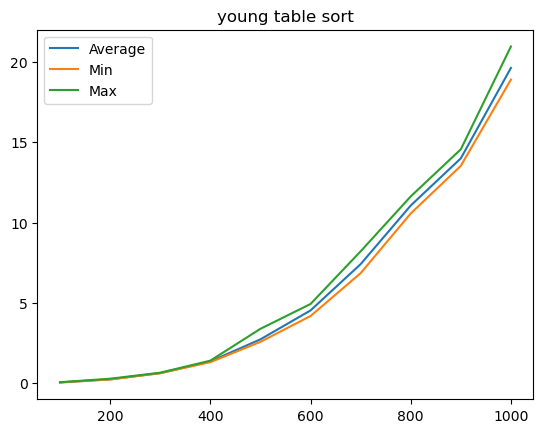

In [13]:
plt.plot(x, average, label='Average')
plt.plot(x, minTime, label='Min')
plt.plot(x, maxTime, label='Max')
plt.legend()
plt.title('young table sort')
plt.show()

In [14]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2


    if l < n and arr[i] < arr[l]:
        largest = l


    if r < n and arr[largest] < arr[r]:
        largest = r


    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]

        heapify(arr, n, largest)


In [15]:
def heapSort(arr):
    n = len(arr)


    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)


    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)


In [24]:
x = []
average = []
minTime = []
maxTime = []
for i in range(1, 11):
    n = i * 1000
    print(f'length of array:{n}')
    sum = 0
    ma = 0
    mi = 1000000000000
    for j in range(10):

        data = genRand(n)
        st = time.process_time()

        heapSort(data)

        et = time.process_time()
        res = et - st
        sum += res
        mi = min(mi, res)
        ma = max(ma, res)
    x.append(n)
    minTime.append(mi)
    maxTime.append(ma)
    average.append(sum / 10)
    print('CPU Mean Execution time:', sum / 10, 'Max:', ma, ' Min:', mi, ' seconds')


length of array:1000
CPU Mean Execution time: 0.00625 Max: 0.015625  Min: 0.0  seconds
length of array:2000
CPU Mean Execution time: 0.015625 Max: 0.015625  Min: 0.015625  seconds
length of array:3000
CPU Mean Execution time: 0.021875 Max: 0.03125  Min: 0.015625  seconds
length of array:4000
CPU Mean Execution time: 0.0328125 Max: 0.046875  Min: 0.03125  seconds
length of array:5000
CPU Mean Execution time: 0.053125 Max: 0.0625  Min: 0.046875  seconds
length of array:6000
CPU Mean Execution time: 0.05625 Max: 0.078125  Min: 0.046875  seconds
length of array:7000
CPU Mean Execution time: 0.0625 Max: 0.078125  Min: 0.046875  seconds
length of array:8000
CPU Mean Execution time: 0.0734375 Max: 0.09375  Min: 0.046875  seconds
length of array:9000
CPU Mean Execution time: 0.090625 Max: 0.109375  Min: 0.078125  seconds
length of array:10000
CPU Mean Execution time: 0.0921875 Max: 0.109375  Min: 0.078125  seconds


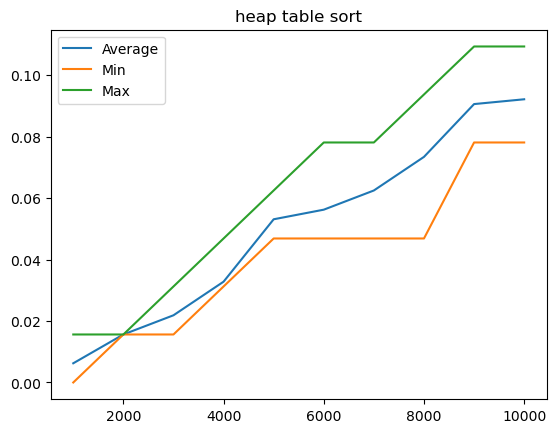

In [26]:
plt.plot(x, average, label='Average')
plt.plot(x, minTime, label='Min')
plt.plot(x, maxTime, label='Max')
plt.legend()
plt.title('heap table sort')
plt.show()

